In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import statsmodels.api as sm
import numpy as np
import io
import requests

weather = pd.read_csv('weather_5yrs.csv')
spotify_gbjp = pd.read_csv("top20_jpgb.csv")
spotify = spotify_gbjp[spotify_gbjp['country'] == 'gb']
NewData = pd.read_csv("SpotifyData.csv")
NewData = NewData.rename(columns={'id': 'track_id'})
NewData.head()

,track_id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.995,0.708,0.1950,0.563,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.994,0.379,0.0135,0.901,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.604,0.749,0.2200,0.000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,9/25/28,1928,0.995,0.781,0.1300,0.887,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,1928,0.990,0.210,0.2040,0.908,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0


In [2]:
#creating month_year column
weather['year_month'] = weather['year'].astype(str) + '/' + weather['month'].astype(str).str.zfill(2)
weather['year_month'].isnull().sum()

np.int64(0)

In [3]:
#changing data type of month year column and creating month and year column
spotify['date'] = pd.to_datetime(spotify['date'], format='mixed')
spotify['month'] = spotify['date'].dt.month
spotify['year'] = spotify['date'].dt.year
spotify['year_month'] = spotify['year'].astype(str) + '/' + spotify['month'].astype(str).str.zfill(2)
spotify.head()

/tmp/ipykernel_1185/3835986466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify['date'] = pd.to_datetime(spotify['date'], format='mixed')
/tmp/ipykernel_1185/3835986466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify['month'] = spotify['date'].dt.month
/tmp/ipykernel_1185/3835986466.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

,date,country,position,streams,track_id,artists,artist_genres,duration,explicit,name,month,year,year_month
0,2018-04-26,gb,16.0,1775048.0,0nrRP2bk19rLc0orkWPQk2,['Avicii'],"['pop rap', 'pop', 'pop dance', 'dance pop', '...",247426.0,False,Wake Me Up,4,2018,2018/04
6,2017-04-13,gb,8.0,2227770.0,5Ohxk2dO5COHF1krpoPigN,['Harry Styles'],['pop'],340706.0,False,Sign of the Times,4,2017,2017/04
7,2017-04-20,gb,12.0,1834981.0,5Ohxk2dO5COHF1krpoPigN,['Harry Styles'],['pop'],340706.0,False,Sign of the Times,4,2017,2017/04
8,2017-04-27,gb,13.0,1749291.0,5Ohxk2dO5COHF1krpoPigN,['Harry Styles'],['pop'],340706.0,False,Sign of the Times,4,2017,2017/04
9,2017-04-05,gb,20.0,1540263.0,5Ohxk2dO5COHF1krpoPigN,['Harry Styles'],['pop'],340706.0,False,Sign of the Times,4,2017,2017/04


In [4]:
#merging datasets and removing redundant information
spotify_weather = spotify.merge(weather, on = 'year_month')
spotify_weather = spotify_weather.drop('year_x', axis = 1)
spotify_weather = spotify_weather.drop('year_y', axis = 1)
spotify_weather = spotify_weather.drop('month_x', axis = 1)
spotify_weather = spotify_weather.drop('month_y', axis = 1)
spotify_weather = spotify_weather.drop('date', axis = 1)
spotify_weather['year_month'].isnull().sum()

np.int64(0)

In [61]:
#grouping by year_month and getting average values and explicit ratio

spotify_weather = pd.DataFrame(spotify_weather)



#grouping by year_month and country, calculate averages for rain, sun, and temperature
monthly_avg = spotify_weather.groupby(['year_month', 'position']).agg({
    'rain': 'mean',
    'sun': 'mean',
    'tmin': 'mean',
    'tmax': 'mean'
}).reset_index()

#calculating the ratio of explicit to non-explicit songs
spotify_weather['explicit'] = spotify_weather['explicit'].astype(int)  # Convert boolean to 1 for True and 0 for False

#counting explicit songs and total songs per year_month and position
explicit_count = spotify_weather.groupby(['year_month', 'position'])['explicit'].sum().reset_index(name='explicit_count')
song_count = spotify_weather.groupby(['year_month', 'position']).size().reset_index(name='song_count')

#merging the counts
song_data = pd.merge(explicit_count, song_count, on=['year_month', 'position'])

#calculating the ratio of explicit to non-explicit songs
song_data['non_explicit_count'] = song_data['song_count'] - song_data['explicit_count']
song_data['ex_ratio'] = song_data['explicit_count'] / song_data['non_explicit_count']

#merging the weather data with the song data
ex_df = pd.merge(monthly_avg, song_data[['year_month', 'position', 'ex_ratio']], on=['year_month', 'position'])
ex_df['avg_temp'] = (ex_df['tmin'] + ex_df['tmax']) / 2
ex_df['ex_perc'] = (song_data['explicit_count'] / (song_data['explicit_count'] + song_data['non_explicit_count'])) * 100
ex_df = ex_df.drop(ex_df[ex_df['ex_perc'] == 0].index)

ex_df.tail()

,year_month,position,rain,sun,tmin,tmax,ex_ratio,avg_temp,ex_perc
632,2020/05,18.0,25.376923,266.48750,6.950000,16.803846,inf,11.876923,100.0
635,2020/06,1.0,87.523077,159.15625,10.542308,18.261538,inf,14.401923,100.0
636,2020/06,2.0,87.523077,159.15625,10.542308,18.261538,1.0,14.401923,50.0
644,2020/06,17.0,87.523077,159.15625,10.542308,18.261538,inf,14.401923,100.0
645,2020/06,19.0,87.523077,159.15625,10.542308,18.261538,inf,14.401923,100.0


In [6]:
#removing infinite values

ex_df['ex_ratio'] = ex_df['ex_ratio'].replace([float('inf'), float('-inf')], np.nan)
ex_df = ex_df.dropna(subset=['ex_ratio'])

#counting inf and -inf values to make sure none are left
print((ex_df['ex_ratio'] == float('inf')).sum())
print((ex_df['ex_ratio'] == float('-inf')).sum())  

0
0


$$\text{Percentage of Explicitness} = \beta_0 + \beta_1 \cdot \text{rain} + \beta_2 \cdot \text{sun} + \beta_3 \cdot \text{avg-temp}$$

In [7]:
#creating model for explicit percentage and predictors: average temp; sun and rain
spotify_top10 = ex_df[ex_df['position'] <= 10.0]

formula_string = "ex_perc ~ avg_temp + sun + rain"

model_ex_10 = sm.formula.ols(formula = formula_string, data = spotify_top10)
model_fitted_ex_10 = model_ex_10.fit()
print (model_fitted_ex_10.summary())


                            OLS Regression Results                            
Dep. Variable:                ex_perc   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.7950
Date:                Thu, 03 Apr 2025   Prob (F-statistic):              0.503
Time:                        16:32:17   Log-Likelihood:                -201.99
No. Observations:                  53   AIC:                             412.0
Df Residuals:                      49   BIC:                             419.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.0921     10.323      3.884      0.0

The adjusted r-squared value is negative when avg_temp is included and either negative or a very low value for other combinations of the variables: avg_temp; rain and sun

This shows that there is very little to no relation between rain, sun and average temperature and the dependent variable (Percentage of Explicit songs).

There are high P values for each of the variables used to predict the ratio of explicit to non explicit songs, meaning that there is no statistically significant relation between weather and the ratio

Text(0, 0.5, 'Percentage of Explicit Songs')

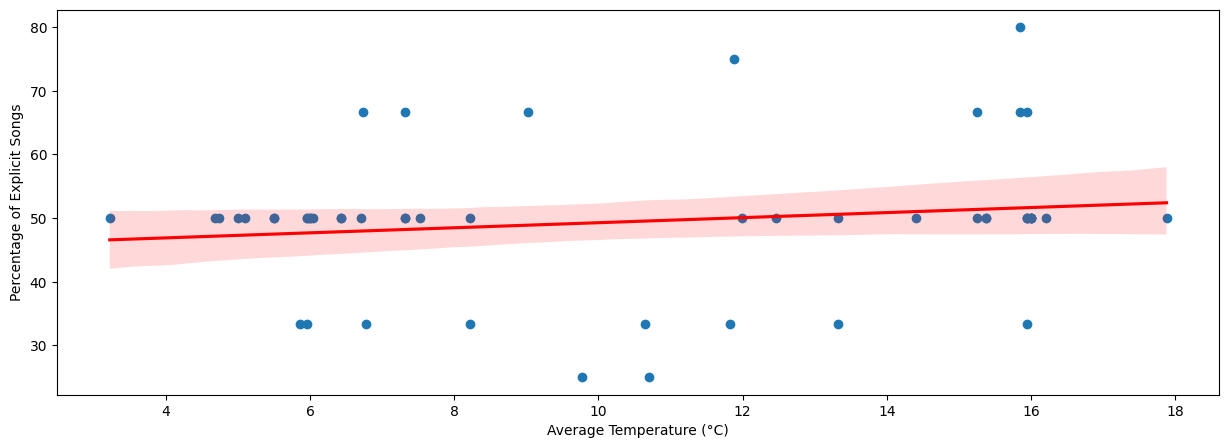

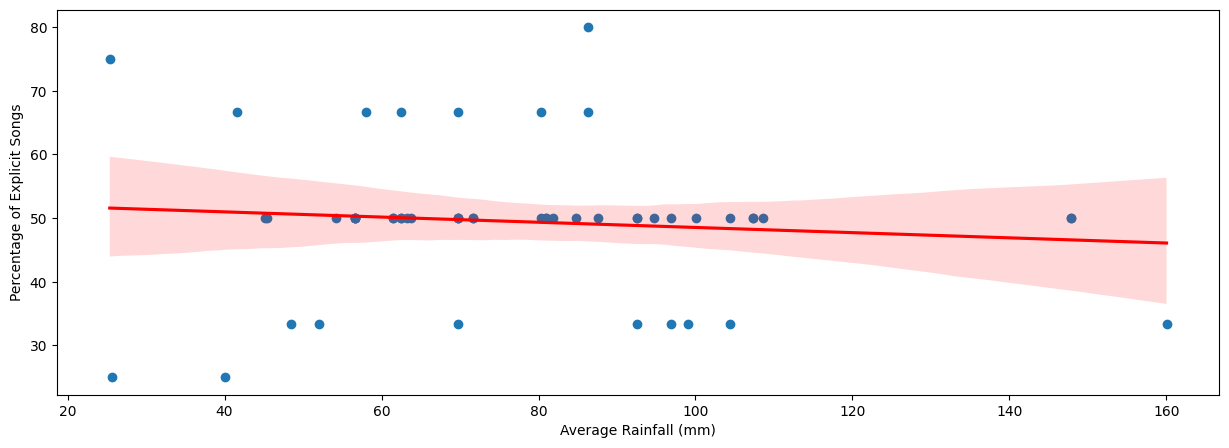

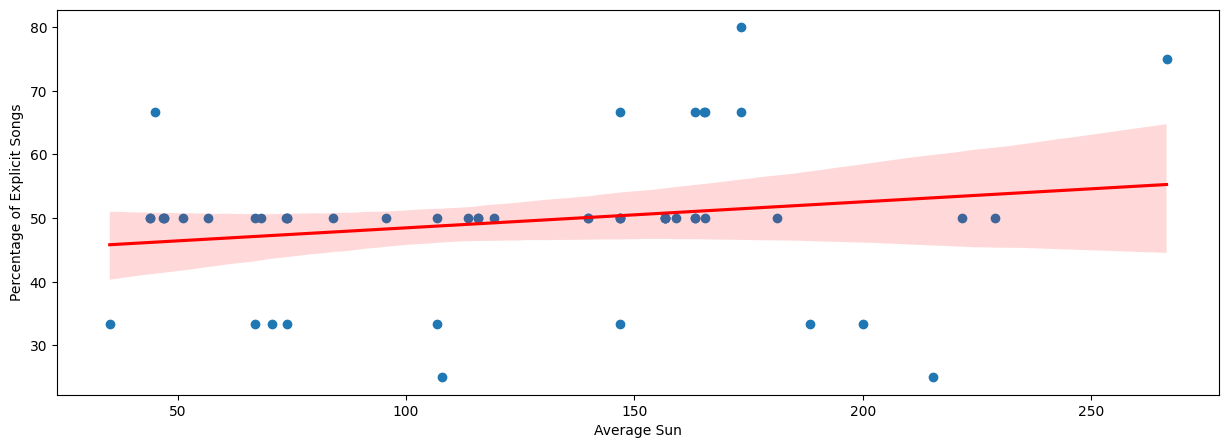

In [8]:
#creating regression plots for each of the predictor variables against the explicit percentage

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
sns.regplot(x = spotify_top10['avg_temp'], y = spotify_top10['ex_perc'], scatter_kws={'alpha':1}, line_kws={'color':'red'})
plt.xlabel('Average Temperature (°C)', fontsize = 10)
plt.ylabel('Percentage of Explicit Songs', fontsize = 10)

plt.figure(figsize=(15, 5))
sns.regplot(x = spotify_top10['rain'], y = spotify_top10['ex_perc'], scatter_kws={'alpha':1}, line_kws={'color':'red'})
plt.xlabel('Average Rainfall (mm)', fontsize = 10)
plt.ylabel('Percentage of Explicit Songs', fontsize = 10)

plt.figure(figsize=(15, 5))
sns.regplot(x = spotify_top10['sun'], y = spotify_top10['ex_perc'], scatter_kws={'alpha':1}, line_kws={'color':'red'})
plt.xlabel('Average Sun', fontsize = 10)
plt.ylabel('Percentage of Explicit Songs', fontsize = 10)

In the graphs above, the regression line is relatively flat. This shows there is no significant effect on the dependent variable from any of the predictors.

There is also a wide confidence interval showing low statistical accuracy. 

The combination of these two factors shows little to no signifcant relation between any of the predictors and the dependent variable.

We used data for only Great Britain and from 2016 - 2020. This is party due to keep accuracy as it would be over a smaller area with less cultural deviation and over a perdio of 5 years as to have more data and greater accuracy with changes in weather over time (e.g. there might be one very warm or cold year which would skew the data)

In [9]:
#creating model for top 20 (spotify_top10 was filtered for top 10 from ex_df that contains the top 20)
formula_string = "ex_perc ~ avg_temp + sun + rain"

model_ex_20 = sm.formula.ols(formula = formula_string, data = ex_df)
model_fitted_ex_20 = model_ex_20.fit()
print (model_fitted_ex_20.summary())

                            OLS Regression Results                            
Dep. Variable:                ex_perc   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.351
Date:                Thu, 03 Apr 2025   Prob (F-statistic):              0.261
Time:                        16:32:17   Log-Likelihood:                -467.52
No. Observations:                 124   AIC:                             943.0
Df Residuals:                     120   BIC:                             954.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.2226      5.758      6.811      0.0

The model above has a very low adj r-squared value showing it is not good at predicting the relationship between the predictors and the dependent variable

When rain (the variable with the highest p-value) is removed, the adj r-squared value decreases, there are no combinations of the above variables where it increases

There is one variable (sun) that has a p-value of below 0.05, this means that although the relationship may be weak it is statistically significant.

This indicates that there is a weak but significant relationship between sun and explicit percentage in the top 20 songs but not the top 10

Text(0, 0.5, '% of Songs that are Explicit')

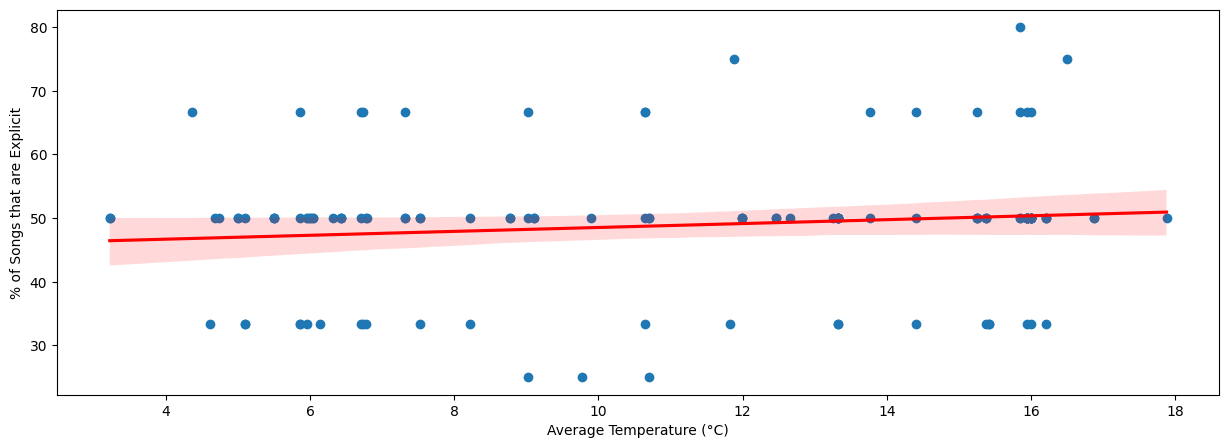

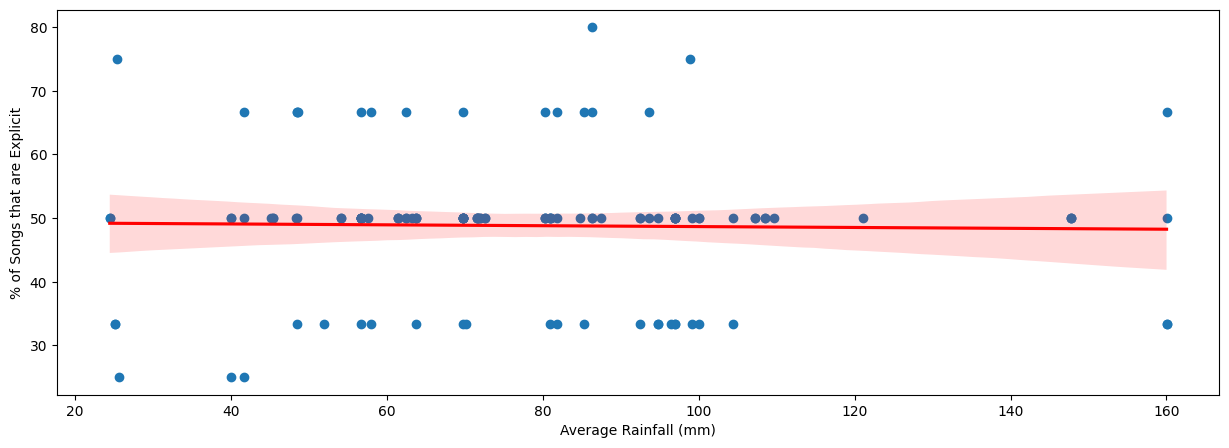

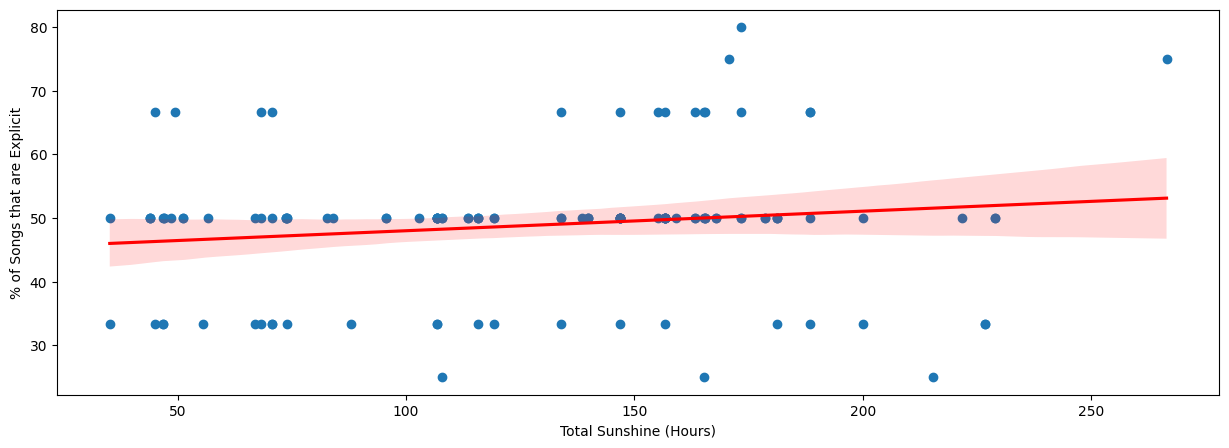

In [25]:
#plotting graphs for top 20
plt.figure(figsize=(15, 5))
sns.regplot(x = ex_df['avg_temp'], y = ex_df['ex_perc'], scatter_kws={'alpha':1}, line_kws={'color':'red'})
plt.xlabel('Average Temperature (°C)', fontsize = 10)
plt.ylabel('% of Songs that are Explicit', fontsize = 10)

plt.figure(figsize=(15, 5))
sns.regplot(x = ex_df['rain'], y = ex_df['ex_perc'], scatter_kws={'alpha':1}, line_kws={'color':'red'})
plt.xlabel('Average Rainfall (mm)', fontsize = 10)
plt.ylabel('% of Songs that are Explicit', fontsize = 10)

plt.figure(figsize=(15, 5))
sns.regplot(x = ex_df['sun'], y = ex_df['ex_perc'], scatter_kws={'alpha':1}, line_kws={'color':'red'})
plt.xlabel('Total Sunshine (Hours)', fontsize = 10)
plt.ylabel('% of Songs that are Explicit', fontsize = 10)

The graphs above have relatively flat regression lines. This shows there is no significant/strong effect on the dependent variable from any of the predictors.

The confidence interval is narrower than the graphs for the top 10 songs showing higher statistical accuracy than for the top 10.

# EVALUATIONS

In [11]:
residuals_10 = model_fitted_ex_10.resid.dropna() #removing nan values
residuals_10 = residuals_10[~residuals_10.isin([np.inf, -np.inf])]  #removing infinite values

residuals_20 = model_fitted_ex_20.resid.dropna() #removing nan values
residuals_20 = residuals_20[~residuals_20.isin([np.inf, -np.inf])]  #removing infinite values

from scipy.stats import shapiro

shapiro_test_10 = shapiro(residuals_10)
shapiro_test_20 = shapiro(residuals_20)
print ("Shapiro Test for top 10:", shapiro_test_10)
print ("Shapiro Test for top 20:", shapiro_test_20)

Shapiro Test for top 10: ShapiroResult(statistic=np.float64(0.9226600485428332), pvalue=np.float64(0.0021073864686902634))
Shapiro Test for top 20: ShapiroResult(statistic=np.float64(0.9003773723132311), pvalue=np.float64(1.4086999466514395e-07))


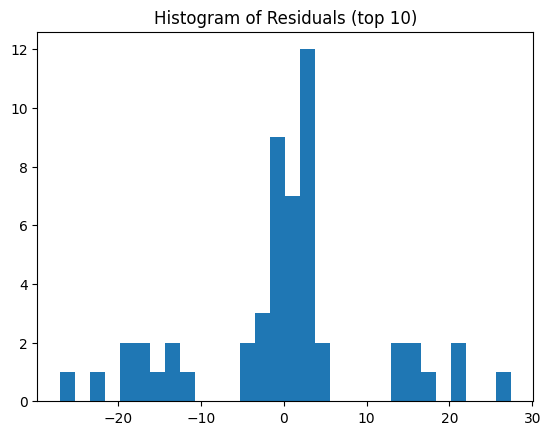

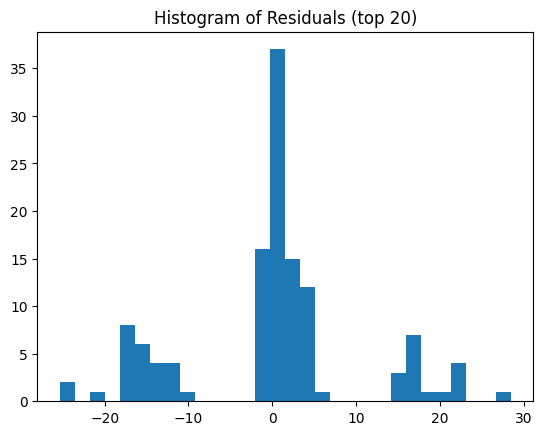

In [12]:
plt.hist(residuals_10, bins=30)
plt.title("Histogram of Residuals (top 10)")
plt.show()

plt.hist(residuals_20, bins=30)
plt.title("Histogram of Residuals (top 20)")
plt.show()

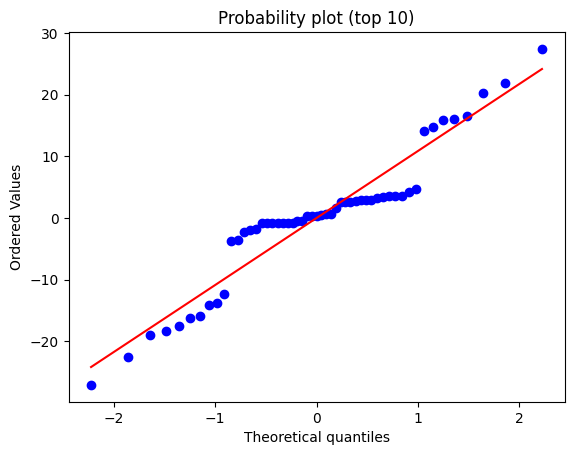

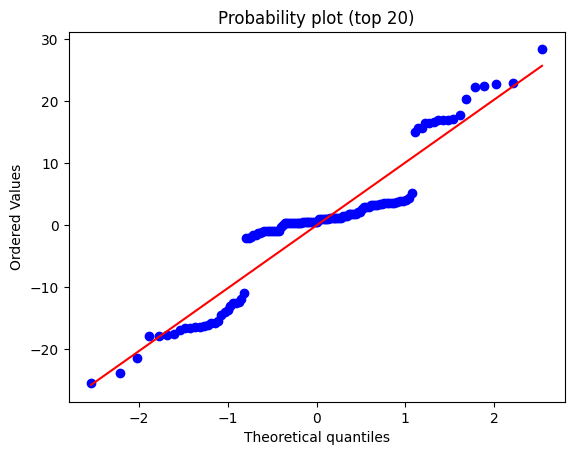

In [13]:
from scipy.stats import probplot
probplot(residuals_10, plot=plt)
plt.title("Probability plot (top 10)")
plt.show()

from scipy.stats import probplot
probplot(residuals_20, plot=plt)
plt.title("Probability plot (top 20)")
plt.show()


**The tests above show that the residuals for both top 10 and top 20 are not normally distributed. This indicates the predictors (sun, rainfall and average temperature) are not good at explaining the variance in the explicitness of songs and there is no statistically significant effect.**


In [14]:
energy_weather = spotify_weather.merge(NewData, on = 'track_id')
energy_weather['avg_temp'] = energy_weather['tmin'] + energy_weather['tmax'] / 2
energy_weather.head()

,country,position,streams,track_id,artists_x,artist_genres,duration,explicit_x,name_x,year_month,...,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit_y,avg_temp
0,gb,8.0,2227770.0,5Ohxk2dO5COHF1krpoPigN,['Harry Styles'],['pop'],340706.0,0,Sign of the Times,2017/04,...,0.109,-4.63,0.0313,119.972,0.222,1,5,81,0,12.35
1,gb,8.0,2227770.0,5Ohxk2dO5COHF1krpoPigN,['Harry Styles'],['pop'],340706.0,0,Sign of the Times,2017/04,...,0.109,-4.63,0.0313,119.972,0.222,1,5,81,0,11.85
2,gb,8.0,2227770.0,5Ohxk2dO5COHF1krpoPigN,['Harry Styles'],['pop'],340706.0,0,Sign of the Times,2017/04,...,0.109,-4.63,0.0313,119.972,0.222,1,5,81,0,10.35
3,gb,8.0,2227770.0,5Ohxk2dO5COHF1krpoPigN,['Harry Styles'],['pop'],340706.0,0,Sign of the Times,2017/04,...,0.109,-4.63,0.0313,119.972,0.222,1,5,81,0,11.15
4,gb,8.0,2227770.0,5Ohxk2dO5COHF1krpoPigN,['Harry Styles'],['pop'],340706.0,0,Sign of the Times,2017/04,...,0.109,-4.63,0.0313,119.972,0.222,1,5,81,0,7.00


In [63]:
formula_string = "energy ~ avg_temp + sun"

model = sm.formula.ols(formula = formula_string, data = energy_weather)
model_fitted = model.fit()
print (model_fitted.summary())


                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     185.5
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           6.76e-80
Time:                        18:37:43   Log-Likelihood:                 4880.3
No. Observations:               10507   AIC:                            -9755.
Df Residuals:                   10504   BIC:                            -9733.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5758      0.004    152.994      0.0

In the model there is a low adjusted r-sqaured value showing it is not good at predicting the relationship between the predictors and the dependent variable and does not explain much of the variation of the predicted variable (energy). However the P-value is very low for average temperature and sun, indicating a weak but statistically significant relation between them. There is a positive correlation between average temperature and energy and a negative correlation between sun and energy. Rain has a P-value above 0.05 so has no statistically significant effect on energy.

The adjusted R-squared does not change when removing rain.


# SCATTERPLOTS FOR PREDICTORS AGAINST ENERGY TOP 20

Text(0, 0.5, 'Energy')

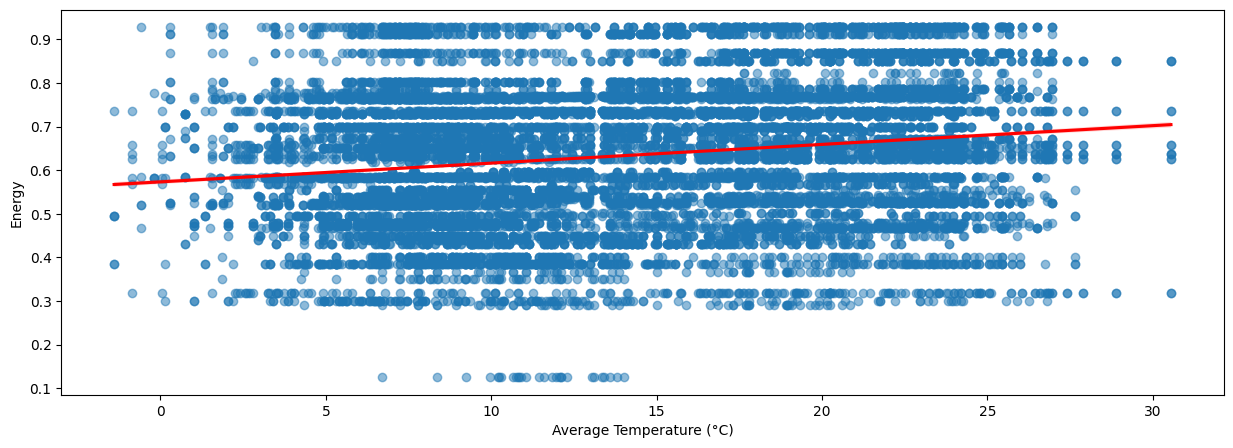

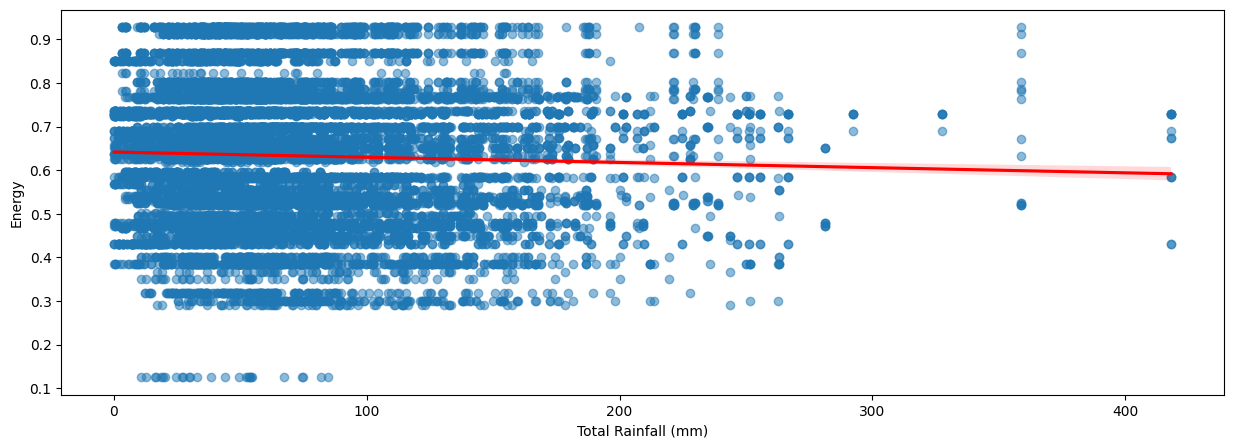

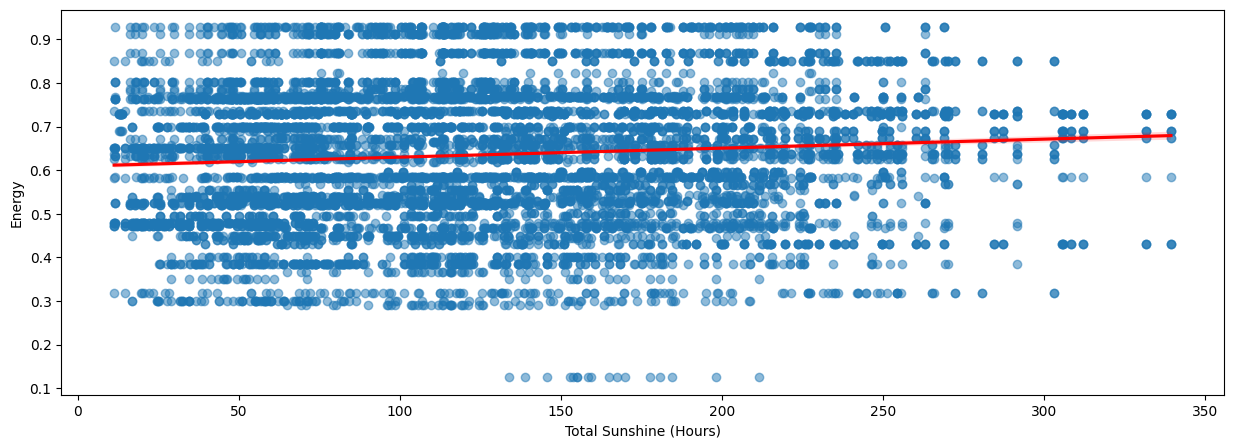

In [24]:
#average temperature against energy
plt.figure(figsize=(15, 5))
sns.regplot(x = energy_weather['avg_temp'], y = energy_weather['energy'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Average Temperature (°C)', fontsize = 10)
plt.ylabel('Energy', fontsize = 10)
#total rainfall against energy
plt.figure(figsize=(15, 5))
sns.regplot(x = energy_weather['rain'], y = energy_weather['energy'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Total Rainfall (mm)', fontsize = 10)
plt.ylabel('Energy', fontsize = 10)
#percentage of sunshine against energy
plt.figure(figsize=(15, 5))
sns.regplot(x = energy_weather['sun'], y = energy_weather['energy'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Total Sunshine (Hours)', fontsize = 10)
plt.ylabel('Energy', fontsize = 10)

# SCATTERPLOTS FOR PREDICTORS AGAINST ENERGY TOP 10

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     97.69
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           1.20e-61
Time:                        17:31:30   Log-Likelihood:                 2892.6
No. Observations:                5657   AIC:                            -5777.
Df Residuals:                    5653   BIC:                            -5751.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5812      0.008     77.481      0.0

Text(0, 0.5, 'Energy')

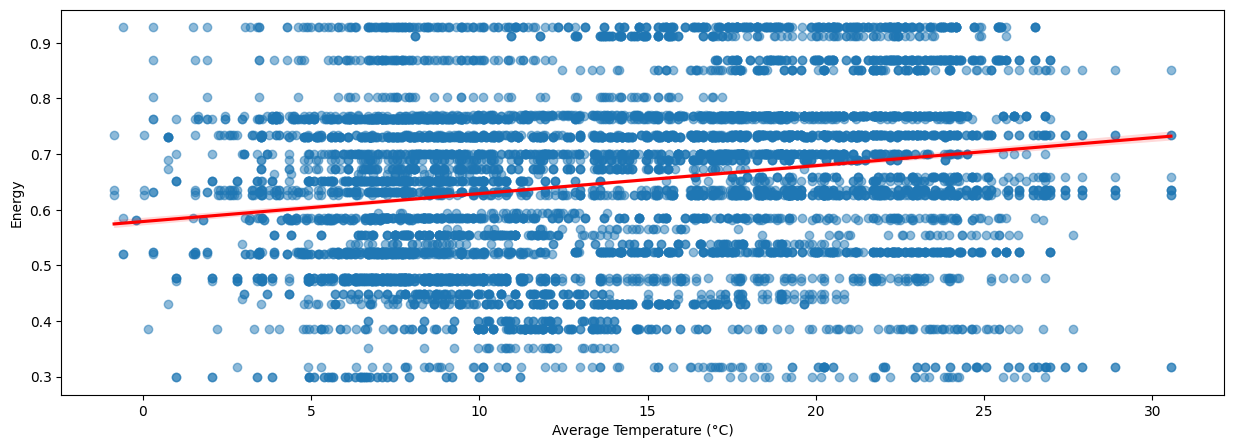

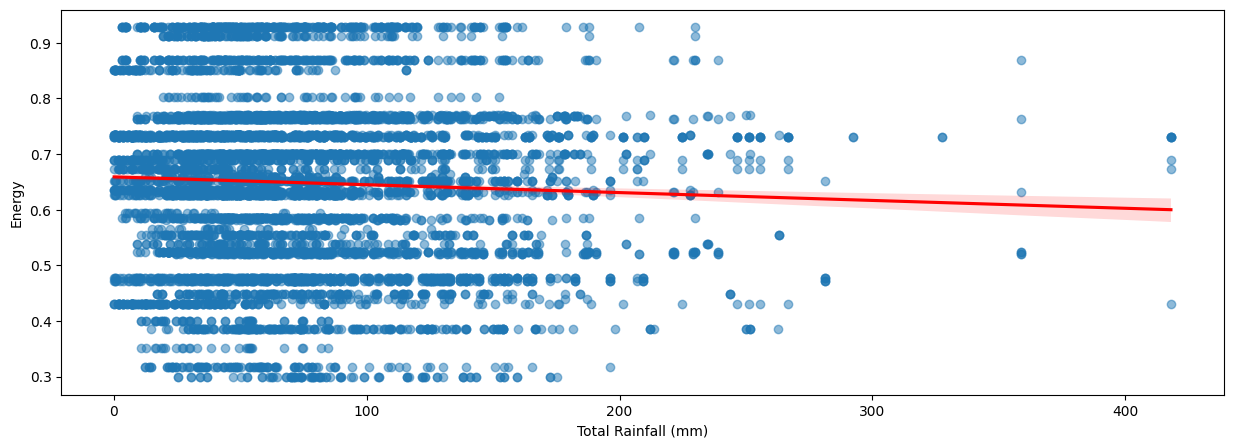

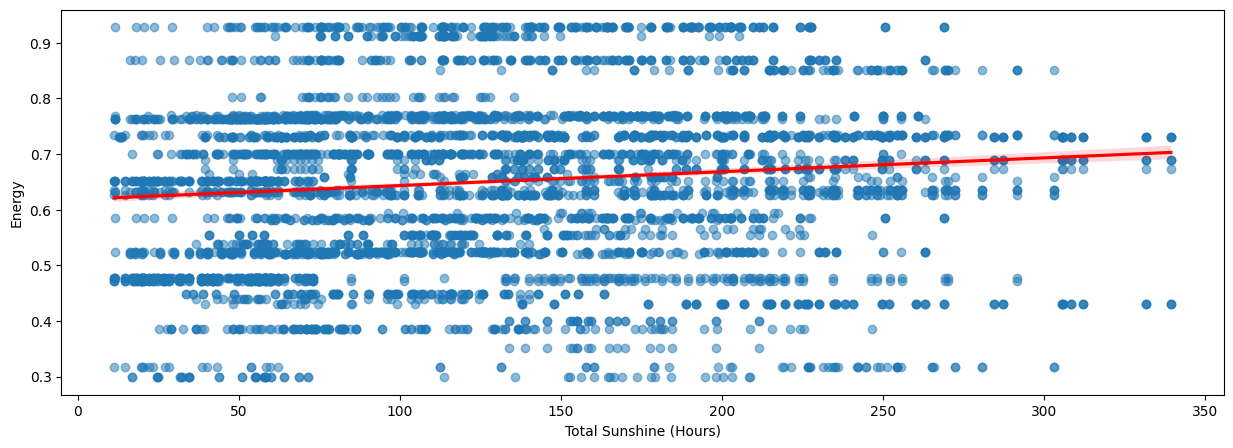

In [56]:
energy_weather_top10 = energy_weather[energy_weather['position'] <= 10]

formula_string_10 = "energy ~ avg_temp + sun + rain"

model_10 = sm.formula.ols(formula = formula_string_10, data = energy_weather_top10)
model_fitted_10 = model_10.fit()
print (model_fitted_10.summary())

plt.figure(figsize=(15, 5))
sns.regplot(x = energy_weather_top10['avg_temp'], y = energy_weather_top10['energy'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Average Temperature (°C)', fontsize = 10)
plt.ylabel('Energy', fontsize = 10)
#total rainfall against energy
plt.figure(figsize=(15, 5))
sns.regplot(x = energy_weather_top10['rain'], y = energy_weather_top10['energy'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Total Rainfall (mm)', fontsize = 10)
plt.ylabel('Energy', fontsize = 10)
#percentage of sunshine against energy
plt.figure(figsize=(15, 5))
sns.regplot(x = energy_weather_top10['sun'], y = energy_weather_top10['energy'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Total Sunshine (Hours)', fontsize = 10)
plt.ylabel('Energy', fontsize = 10)

Both sets of scatterplots show the same relation between each predictor variable and the predicted variable (energy). 

There is a positive correlation between sunshine and average temperature and energy, and a negative correlation between rainfall and energy.

The confidence intervals for the scatterlpots using the top 20 songs showing that there is a higher statistical accuracy using data including the top 20 songs

# SIMULATED VALUES FOR NAN TOP 20

In [79]:
energy_weather_copy1 = energy_weather.copy()
energy_weather_copy_2 = energy_weather.copy()


#Replace NA values with max or min values
#V1 --- More sun, less rain, higher temp
energy_weather_copy1['sun'].fillna(energy_weather_copy1['sun'].max(), inplace=True)
energy_weather_copy1['rain'].fillna(energy_weather_copy1['rain'].min(), inplace=True)
energy_weather_copy1['avg_temp'].fillna(energy_weather_copy1['avg_temp'].max(), inplace=True)

energy_weather_copy_2['sun'].fillna(energy_weather_copy_2['sun'].min(), inplace=True)
energy_weather_copy_2['rain'].fillna(energy_weather_copy_2['rain'].max(), inplace=True)
energy_weather_copy_2['avg_temp'].fillna(energy_weather_copy_2['avg_temp'].min(), inplace=True)


#Run Model foor V1
formula_string = "energy ~ rain + sun + avg_temp"

model_1 = sm.formula.ols(formula = formula_string, data = energy_weather_copy1)
model_fitted_1 = model_1.fit()

model_2 = sm.formula.ols(formula = formula_string, data = energy_weather_copy_2)
model_fitted_2 = model_2.fit()

print (model_fitted_1.summary())
print (model_fitted_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     84.45
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           2.83e-54
Time:                        18:50:26   Log-Likelihood:                 8775.9
No. Observations:               19107   AIC:                        -1.754e+04
Df Residuals:                   19103   BIC:                        -1.751e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5973      0.004    149.908      0.0

/tmp/ipykernel_1185/3222990779.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  energy_weather_copy1['sun'].fillna(energy_weather_copy1['sun'].max(), inplace=True)
/tmp/ipykernel_1185/3222990779.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col]

the first simulation replaced nan values for the predictor variables with the highest for average temperature and sun and the minimum for rain. This is because temperature and sun have a positive correlation and rain has a negative correlation with energy. The second simulation did the opposite.

The first simulation has a low adjusted r-sqaured value but all P-values were below 0.05, indicating a weak but statistically significant relation between the predictor variables in these scenario. Removing rain has no effect on the adjusted R-sqaured value and it is highest with either all 3 variables or just temperature and sun.

The second simulation shows a higher adjusted r-sqaured value but still low. The P-values for rain and temperature are below 0.05 and the adjusted R-sqaured value is highest with all 3 variables. This indicates a weak but statistically significant (for rain and temperature) relation in this scenario.

In [85]:
residuals = model_fitted.resid.dropna() #removing nan values
residuals = residuals[~residuals.isin([np.inf, -np.inf])]  #removing infinite values 
from scipy.stats import shapiro

shapiro_test = shapiro(residuals)
print("Shapiro-Wilk Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)
print ("The shapiro tests show that while the residuals follow a bell curve, any deviations are statistically significant. \nThis could be due to the size of the dataset")
print ("The Adjusted R-Squared value is very low, showing that the predictors explain little of the variation in song energy. \nThis could be due to a weak relationship or missing predictors")
print ("Dataset size =", energy_weather.shape)
print ("Adjusted R-Squared =", model_fitted.rsquared_adj)

Shapiro-Wilk Test Statistic: 0.9914592972568701
p-value: 1.3951393646539039e-24
The shapiro tests show that while the residuals follow a bell curve, any deviations are statistically significant. 
This could be due to the size of the dataset
The Adjusted R-Squared value is very low, showing that the predictors explain little of the variation in song energy. 
This could be due to a weak relationship or missing predictors
Dataset size = (19107, 35)
Adjusted R-Squared = 0.0339304102849084


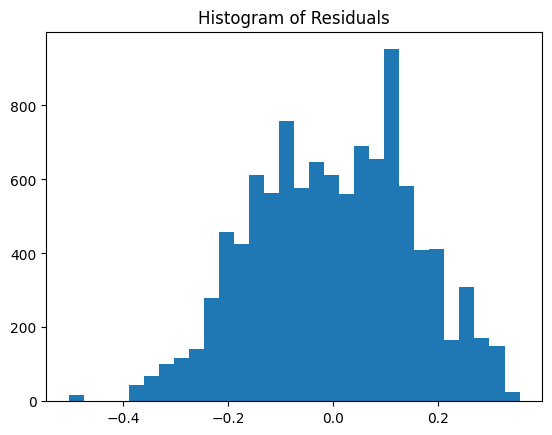

In [20]:
import matplotlib.pyplot as plt

plt.hist(residuals, bins=30)
plt.title("Histogram of Residuals")
plt.show()

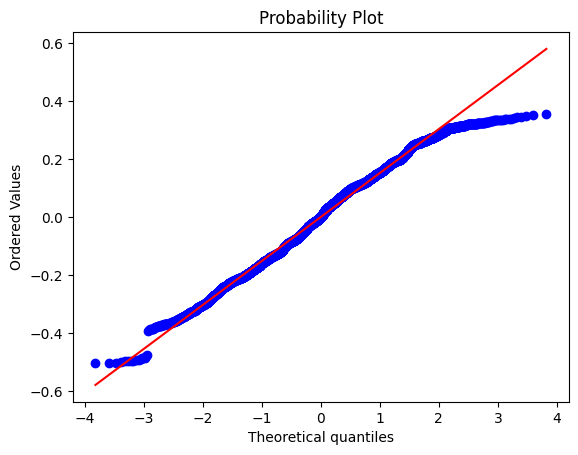

In [60]:
from scipy.stats import probplot
probplot(residuals, plot=plt)
plt.show()

In conclusion, the analysis on whether weather has any effect on eplxicitness or energy of songs people in GB listen to shows that there is little to no statistically significant relation between the weather variables we used (total rainfall, sun and average temperature) and the percentage of songs that are explicit that enter the charts (both for top 10 and top 20) and there is a weak but statistically signifcant relation between total sunshine and average temperature and the energy of songs that enter the charts (top 10 and top 20). Additionally it shows that average tempeerature was often the best predictor (the models with the highest adjusted R-sqaured values usually had average temperature in).

$$\text{Energy} = \beta_0 + \beta_1 \cdot \text{rain} + \beta_2 \cdot \text{sun} + \beta_3 \cdot \text{avg-temp}$$